In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/spam - spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [10]:
df.shape

(5572, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
len(df[df['Category']=='ham']) # not spam

4825

In [12]:
len(df[df['Category']=='spam'])

747

In [8]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [14]:
df['Spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Message,df.Spam,test_size=0.8)

In [17]:
y_train

,Spam
360,0
5225,0
4429,0
995,0
3444,0
...,...
4243,1
4737,0
4994,0
4478,0


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_counts = v.fit_transform(X_train.values)
X_train_counts.toarray()[0].shape

(3529,)

In [19]:
X_train_counts

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 14913 stored elements and shape (1114, 3529)>

In [20]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_counts,y_train)

MultinomialNB()

In [21]:
emails = [
      'Hey Mohamed, can we get together to watch football game tomorrow?',
      'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 0])

In [22]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9762225213100045

In [23]:
y_pred = model.predict(X_test_count)

In [24]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3849
           1       0.96      0.86      0.91       609

    accuracy                           0.98      4458
   macro avg       0.97      0.93      0.95      4458
weighted avg       0.98      0.98      0.98      4458



<Axes: >

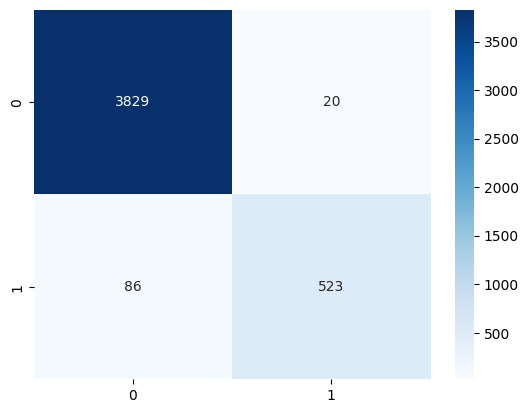

In [25]:
con = confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True,fmt='d',cmap='Blues')

In [26]:
import pickle

# Save to a file
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(model, file)